In [61]:
import pandas as pd
import numpy as np

In [88]:
x_train = pd.read_csv("X_train.csv", low_memory = False)
y_train = pd.read_csv("y_train.csv", low_memory = False)

In [63]:
x_train.describe()

,id,year,fw_start,fw_end,country,v1,v2,v3,v4,v5,...,v278a,v278b,v278c_r,v279a,v279b,v279c_r,v279d_r,v280,v281a_r,v282
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.00000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,4.800000e+04
mean,23999.500000,2017.768500,201780.541229,201817.844646,399.609938,1.541625,1.129792,1.595625,1.696167,2.665500,...,13.088375,24.989479,13.34045,13.849854,27.064062,14.122692,53.857813,1.130667,209.191396,1.991886e+06
std,13856.550797,0.921846,89.317434,77.870720,258.365609,0.860421,0.437359,0.670316,0.741584,1.009417,...,5.276112,18.799484,5.32006,5.491336,18.838022,5.539823,42.932103,1.667653,150.303806,1.332819e+07
min,0.000000,2017.000000,201706.000000,201710.000000,8.000000,-4.000000,-2.000000,-10.000000,-10.000000,-10.000000,...,-4.000000,-4.000000,-4.00000,-4.000000,-4.000000,-4.000000,-5.000000,-4.000000,-2.000000,-4.000000e+00
25%,11999.750000,2017.000000,201709.000000,201801.000000,203.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,11.000000,8.000000,11.28000,12.000000,10.000000,12.200000,40.000000,1.000000,90.000000,2.200000e+01
50%,23999.500000,2018.000000,201801.000000,201804.000000,352.000000,1.000000,1.000000,2.000000,2.000000,3.000000,...,14.000000,24.000000,14.21000,15.000000,27.000000,15.150000,50.000000,1.000000,158.000000,1.580000e+02
75%,35999.250000,2018.000000,201808.000000,201811.000000,643.000000,2.000000,1.000000,2.000000,2.000000,3.000000,...,17.000000,41.000000,17.00000,17.000000,44.000000,17.520000,63.000000,2.000000,377.000000,3.847000e+03
max,47999.000000,2021.000000,202105.000000,202110.000000,826.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,23.000000,59.000000,23.57000,23.000000,59.000000,23.590000,1320.000000,3.000000,600.000000,9.243168e+07


In [89]:
# Discard the columns that are the survey's metadata, flag variables, and interview time data
def remove_irrelevant_col(df):
    response_df = df.iloc[:, 6:]
    start = response_df.columns.get_loc("v277")
    end = response_df.columns.get_loc("v279c_r")
    time_col = response_df.columns[start:end+1]
    response_df = response_df.drop(columns = time_col)
    flags = [col for col in response_df.columns if 'f' in col]
    response_df = response_df.drop(columns=flags)
    return response_df

response_df_train = remove_irrelevant_col(x_train)
response_df_train

,v1,v2,v3,v4,v5,v7,v8,v9,v10,v11,...,v275b_N2,v275b_N1,v275c_N2,v275c_N1,v276_r,v279d_r,v280,v281a,v281a_r,v282
0,2,1,2,2,3,2,3,1,2,1,...,UA13,UA1,8040103,80401,1,55,1,uk,475,32
1,2,1,2,2,3,2,2,2,2,2,...,RS12,RS1,6880102,68801,3,73,2,sr,397,3
2,2,2,1,1,2,2,1,2,2,1,...,IS00,IS0,3520000,35200,3,-5,2,is,72,87
3,1,2,1,1,2,2,3,2,1,2,...,LV00,LV0,4280000,42800,5,9,1,lv,256,5157
4,1,1,2,2,3,2,1,2,1,1,...,AT13,AT1,400103,4001,5,62,1,de,158,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,1,1,1,2,2,1,1,2,2,2,...,MK00,MK0,8070000,80700,1,38,1,mk,279,1
47996,1,1,1,2,2,1,1,1,2,1,...,NO04,NO0,5780004,57800,2,85,1,no,200,1302
47997,2,1,1,2,4,1,1,2,2,2,...,AL03,AL0,80203,800,2,40,1,sq,13,10
47998,2,1,2,2,3,1,2,2,2,1,...,DK04,DK0,2080004,20800,-4,-4,-4,da,32,-4


In [65]:
# Parse the codebook.txt to get the column information
import re
with open('codebook.txt', 'r', encoding='utf-8') as file:
    content = file.read()

variable_info = {}
pattern = r"-+\n(v\d+[a-zA-Z]?(_[a-zA-Z\d]+)*\s+(.*?)|age_?[A-Za-z\d]+\s+(.*?))\n-+"
matches = re.findall(pattern, content, re.DOTALL)
for match in matches:
    lines = match[0].strip().split('\n')
    for line in lines:
        parts = line.split(maxsplit=1)  # Extracting the header
        variable_info[parts[0]] = parts[1]

variable_info_df = pd.DataFrame(list(variable_info.items()), columns=['label', 'info'])
pd.set_option('display.max_rows', 500)
print(variable_info_df['label'])

0                  v1
1                  v2
2                  v3
3                  v4
4                  v5
5                  v7
6                  v8
7                  v9
8                 v10
9                 v11
10                v12
11                v13
12                v14
13                v15
14                v16
15                v17
16                v18
17                v19
18                v20
19               v20a
20               v20b
21                v21
22                v22
23                v23
24                v24
25            v24a_IT
26            v24b_IT
27                v25
28                v26
29                v27
30                v28
31                v29
32                v30
33               v30a
34               v30b
35               v30c
36                v31
37                v32
38                v33
39                v34
40                v35
41                v36
42                v37
43                v38
44                v39
45        

In [97]:
# Most of variables are categorical or ordinal, they are encoded to int in the dataset and negative values are trivial (meaning no answer, do not know, etc.). 
# Filter out those columns with more than x percents negative values
def remove_cols_with_too_many_missing(percentage, df):
    df = df.select_dtypes(include="int")
    percentage_negatives = (df < 0).mean()
    filtered_columns = percentage_negatives[percentage_negatives <= percentage].index.tolist()
    df = df[filtered_columns]
    return df

filtered_df_train = remove_cols_with_too_many_missing(0.15, response_df_train)
filtered_df_train

,v1,v2,v3,v4,v5,v7,v8,v9,v10,v11,...,v272,v273,v274,v275c_N2,v275c_N1,v276_r,v279d_r,v280,v281a_r,v282
0,2,1,2,2,3,2,3,1,2,1,...,4,2,4,8040103,80401,1,55,1,475,32
1,2,1,2,2,3,2,2,2,2,2,...,3,3,2,6880102,68801,3,73,2,397,3
2,2,2,1,1,2,2,1,2,2,1,...,1,1,4,3520000,35200,3,-5,2,72,87
3,1,2,1,1,2,2,3,2,1,2,...,4,4,3,4280000,42800,5,9,1,256,5157
4,1,1,2,2,3,2,1,2,1,1,...,2,2,4,400103,4001,5,62,1,158,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,1,1,1,2,2,1,1,2,2,2,...,4,2,2,8070000,80700,1,38,1,279,1
47996,1,1,1,2,2,1,1,1,2,1,...,4,2,2,5780004,57800,2,85,1,200,1302
47997,2,1,1,2,4,1,1,2,2,2,...,4,6,1,80203,800,2,40,1,13,10
47998,2,1,2,2,3,1,2,2,2,1,...,4,1,-1,2080004,20800,-4,-4,-4,32,-4


In [23]:
# Investigate max values of variables
max_values_counts = filtered_df_train.max().value_counts()
print(max_values_counts, "\n")

def investigate_max_value(max_value, df):
    index = df.columns[df.max() == max_value]
    max_value_columns = variable_info_df[variable_info_df['label'].isin(index)]
    return max_value_columns

for max_val in max_values_counts.index:
    print(f"columns with max value = {max_val} are: \n")
    print(investigate_max_value(max_val, filtered_df_train), "\n")

4           80
2           57
10          44
5           32
3           19
6666        17
66          14
6           13
7            6
666          3
80716        3
82           1
11           1
600          1
1320         1
82622        1
8262209      1
78           1
9            1
88           1
99           1
2003         1
70           1
92431675     1
dtype: int64 

columns with max value = 4 are: 

     label                                               info
0       v1                   how important in your life: work
1       v2                 how important in your life: family
2       v3  how important in your life: friends and acquai...
3       v4           how important in your life: leisure time
4       v5               how important in your life: politics
5       v7       taking all things together how happy are you
37     v32                    how much you trust: your family
38     v33    how much you trust: people in your neighborhood
39     v34     how much you trust

In [98]:
# Drop year of born, age (because we have age intervals), and id number

filtered_df_train = filtered_df_train.drop(columns = ['v226', 'age', 'v282'])
filtered_df_train

,v1,v2,v3,v4,v5,v7,v8,v9,v10,v11,...,v271,v272,v273,v274,v275c_N2,v275c_N1,v276_r,v279d_r,v280,v281a_r
0,2,1,2,2,3,2,3,1,2,1,...,3,4,2,4,8040103,80401,1,55,1,475
1,2,1,2,2,3,2,2,2,2,2,...,2,3,3,2,6880102,68801,3,73,2,397
2,2,2,1,1,2,2,1,2,2,1,...,3,1,1,4,3520000,35200,3,-5,2,72
3,1,2,1,1,2,2,3,2,1,2,...,4,4,4,3,4280000,42800,5,9,1,256
4,1,1,2,2,3,2,1,2,1,1,...,1,2,2,4,400103,4001,5,62,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,1,1,1,2,2,1,1,2,2,2,...,4,4,2,2,8070000,80700,1,38,1,279
47996,1,1,1,2,2,1,1,1,2,1,...,4,4,2,2,5780004,57800,2,85,1,200
47997,2,1,1,2,4,1,1,2,2,2,...,6,4,6,1,80203,800,2,40,1,13
47998,2,1,2,2,3,1,2,2,2,1,...,2,4,1,-1,2080004,20800,-4,-4,-4,32


In [102]:
# Process y_train
y_train = y_train.values[:,1]
for i in range(len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0

In [26]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

rf1 = RandomForestClassifier(criterion='log_loss')
rf1.fit(filtered_df_train, y_train)
importances = rf1.feature_importances_

In [27]:
# Use top 100 important features to fit the model
cv = StratifiedKFold(3, shuffle=True, random_state=52)
threshold_100 = np.sort(importances)[-100]
top_100_features = [filtered_df_train.columns[i] for i, imp in enumerate(importances) if imp >= threshold_100]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(rf1, filtered_df_train[top_100_features], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9888211409595815

In [28]:
# Use top 50 important features to fit the model
threshold_50 = np.sort(importances)[-50]
top_50_features = [filtered_df_train.columns[i] for i, imp in enumerate(importances) if imp >= threshold_50]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(rf1, filtered_df_train[top_50_features], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9915825168896589

In [29]:
# Use top 150 important features to fit the model
threshold_150 = np.sort(importances)[-150]
top_150_features = [filtered_df_train.columns[i] for i, imp in enumerate(importances) if imp >= threshold_150]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(rf1, filtered_df_train[top_150_features], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9909524888143901

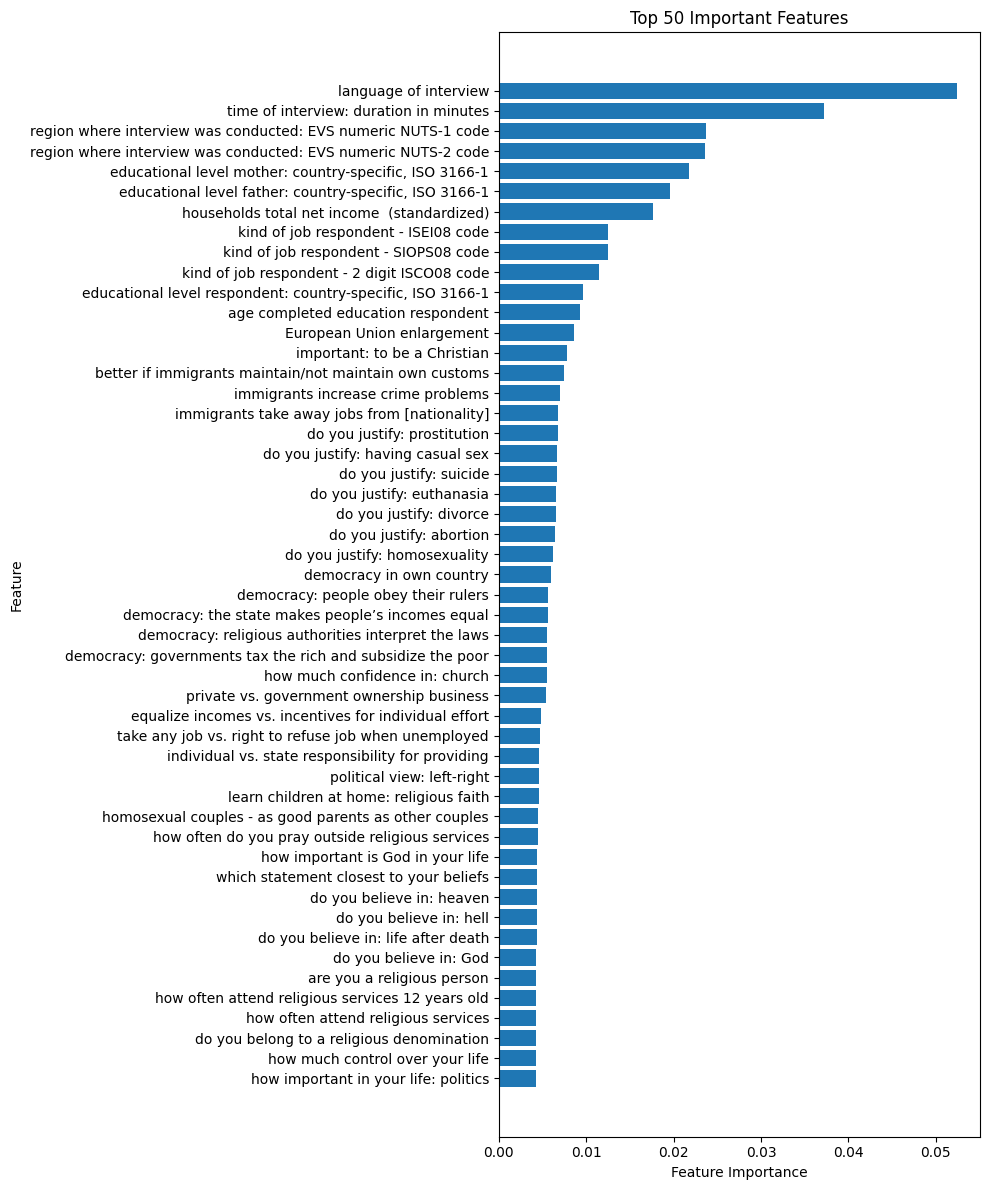

In [30]:
# Plot top 50 important features in random forest model
import matplotlib.pyplot as plt
top_50_feature_importances = np.sort(importances)[-50:]
plt.figure(figsize=(10, 12))
plt.barh(range(len(top_50_feature_importances)), top_50_feature_importances, align='center')
plt.yticks(range(len(top_50_feature_importances)), variable_info_df[variable_info_df['label'].isin(top_50_features)]['info'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Important Features')
plt.tight_layout()
plt.show()

In [31]:
# It turns out that 50 features, 100 features, and 150 features has no significant difference, 
# so I use 50 features for grid search the best params of random forest model due to more efficient computation
# It takes around 15 minutes depending on your computational resources
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=cv, scoring='neg_log_loss', n_jobs=-1, verbose=2)
grid_search_rf.fit(filtered_df_train[top_50_features], y_train)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: -0.9163189645214418


In [103]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax", subsample=0.5, random_state=441)

xgb_model.fit(filtered_df_train, y_train)
importances_xgb = xgb_model.feature_importances_

In [104]:
# Use top 50 important features to fit the model
cv = StratifiedKFold(3, shuffle=True, random_state=52)

threshold_50_xgb = np.sort(importances_xgb)[-50]
top_50_features_xgb = [filtered_df_train.columns[i] for i, imp in enumerate(importances_xgb) if imp >= threshold_50_xgb]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(xgb_model, filtered_df_train[top_50_features_xgb], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.8977486489792812

In [34]:
# Use top 100 important features to fit the model
threshold_100_xgb = np.sort(importances_xgb)[-100]
top_100_features_xgb = [filtered_df_train.columns[i] for i, imp in enumerate(importances_xgb) if imp >= threshold_100_xgb]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(xgb_model, filtered_df_train[top_100_features_xgb], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9018047367418921

In [35]:
# Use top 150 important features to fit the model
threshold_150_xgb = np.sort(importances_xgb)[-150]
top_150_features_xgb = [filtered_df_train.columns[i] for i, imp in enumerate(importances_xgb) if imp >= threshold_150_xgb]

iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(xgb_model, filtered_df_train[top_150_features_xgb], y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9068874396967764

In [36]:
# Use all features to fit the model
iter_scores = np.zeros(10)
for i in range(10):
    score = cross_validate(xgb_model, filtered_df_train, y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()
    iter_scores[i] = score   

iter_scores.mean()

-0.9193947053445697

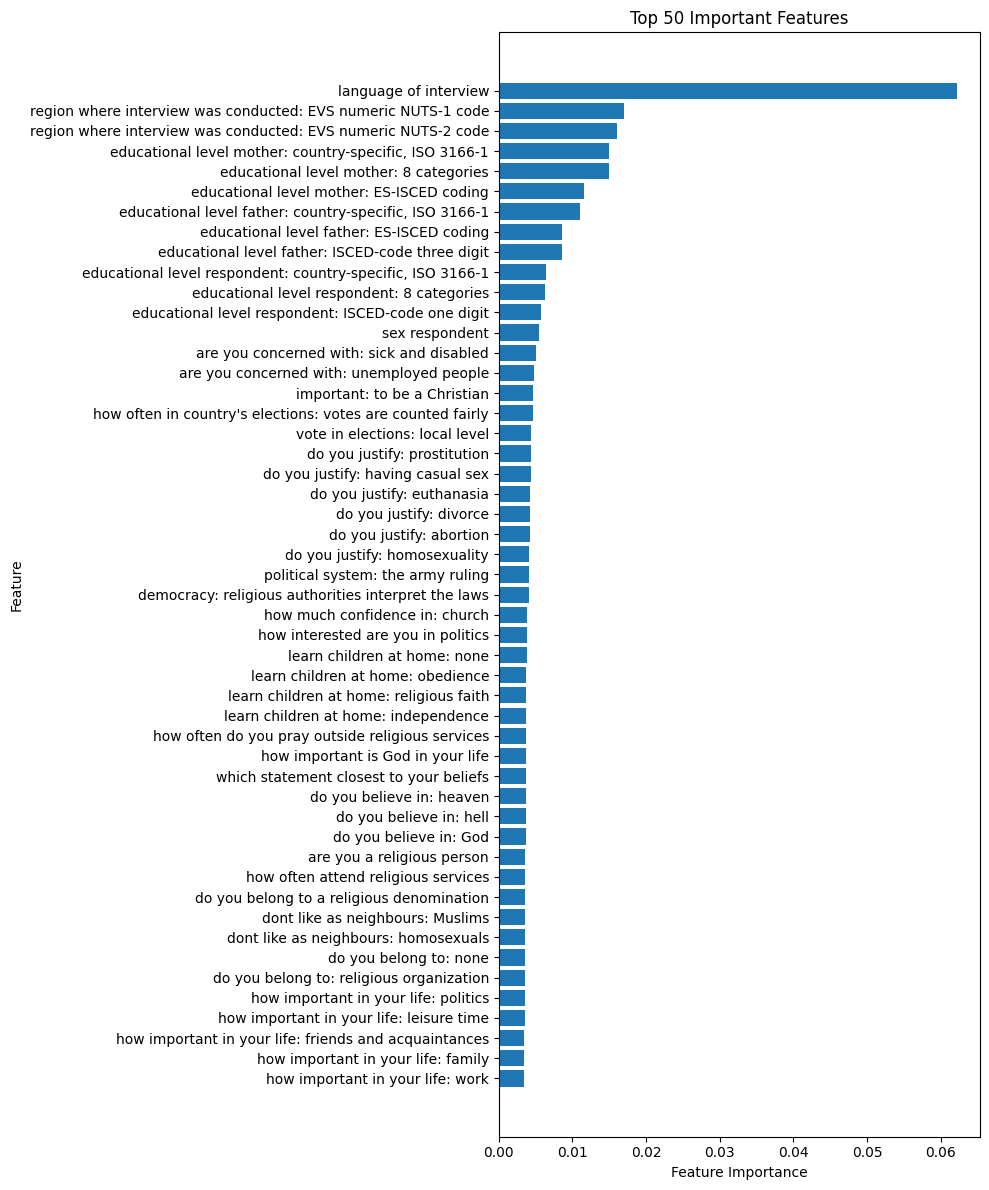

In [105]:
# Plot top 50 important features in xgboost model
import matplotlib.pyplot as plt
top_50_feature_importances_xgb = np.sort(importances_xgb)[-50:]
plt.figure(figsize=(10, 12))
plt.barh(range(len(top_50_feature_importances_xgb)), top_50_feature_importances_xgb, align='center')
plt.yticks(range(len(top_50_feature_importances_xgb)), variable_info_df[variable_info_df['label'].isin(top_50_features_xgb)]['info'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Important Features')
plt.tight_layout()
plt.show()

In [106]:
# Grid search best params for xgboost model
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_leaves': [0, 16, 32, 64]
}
xgb_model = xgb.XGBClassifier(objective="multi:softmax", subsample=0.5, random_state=441, tree_method='hist')
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring="neg_log_loss", n_jobs=-1, cv=cv)
grid_search_xgb.fit(filtered_df_train[top_50_features_xgb], y_train)
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_leaves': 0}
Best Score: -0.858524659968276


In [107]:
best_xgb = grid_search_xgb.best_estimator_

In [108]:
# Use random search to find best params for lightGBM model
# It takes around 15 minutes depending on your computational resources
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'min_child_weight': sp_uniform(0.01, 0.05),
    'subsample': sp_uniform(0.6, 0.4),  
    'colsample_bytree': sp_uniform(0.6, 0.4),  
    'reg_alpha': sp_uniform(0.0, 1.0),  
    'reg_lambda': sp_uniform(0.0, 1.0),  
    'learning_rate': sp_uniform(0.005, 0.05)
}

lgbm = lgb.LGBMClassifier(objective='multiclass', n_jobs=-1, verbose=-1)
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=50, cv=cv, scoring='neg_log_loss', random_state=42)
random_search.fit(filtered_df_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'colsample_bytree': 0.6186662652854461, 'learning_rate': 0.05368777594207296, 'min_child_samples': 370, 'min_child_weight': 0.0328034992108518, 'num_leaves': 49, 'reg_alpha': 0.5142344384136116, 'reg_lambda': 0.5924145688620425, 'subsample': 0.6185801650879991}
Best Score: -0.8554815223518247


In [109]:
best_model_lgbm = random_search.best_estimator_

In [57]:
# Tried different combinations of the above models, and adjusted the base model and meta model, but none of them performs significant better than the xgboost and lightGBM model
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

lr = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000, penalty='l2', C=0.01)

stacked_model = StackingClassifier(classifiers=[lgbm], meta_classifier=lr, use_probas=True, average_probas=False)
cross_validate(stacked_model, filtered_df_train, y_train, cv=cv, n_jobs=-1, scoring=['neg_log_loss'])['test_neg_log_loss'].mean()


-0.8956020307184854

In [99]:
# Preprocess the x_test data
def preprocess(filePath):
    x_test = pd.read_csv(filePath)
    x_test = remove_irrelevant_col(x_test)
    x_test = remove_cols_with_too_many_missing(0.15, x_test)
    x_test = x_test.drop(columns=['v226', 'age', 'v282'])
    return x_test

x_test = preprocess("X_test.csv")
x_test

,v1,v2,v3,v4,v5,v7,v8,v9,v10,v11,...,v271,v272,v273,v274,v275c_N2,v275c_N1,v276_r,v279d_r,v280,v281a_r
0,1,1,1,1,1,1,1,2,2,2,...,3,4,2,2,4990000,49900,3,89,2,186
1,2,1,2,2,2,2,2,2,2,2,...,3,4,3,3,4990000,49900,3,85,2,186
2,1,1,2,2,3,1,2,2,2,1,...,4,4,3,3,4990000,49900,3,54,2,186
3,1,1,2,1,2,2,2,2,2,2,...,4,4,3,2,4990000,49900,3,63,2,186
4,1,1,1,1,2,2,2,2,2,2,...,2,4,1,4,4990000,49900,4,105,1,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11433,2,1,2,2,2,1,2,2,2,2,...,4,4,3,4,8261502,82615,-4,36,1,128
11434,1,1,2,3,4,-1,-1,1,1,2,...,3,4,2,4,80203,800,3,35,1,13
11435,1,1,2,1,2,2,3,1,2,2,...,2,4,1,1,3480301,34803,1,45,1,184
11436,2,1,2,1,3,2,3,2,2,1,...,1,2,1,2,400202,4002,4,61,1,158


In [117]:
# Use lightGBM as the final model to predict y_test
y_pred = best_model_lgbm.predict_proba(x_test)
header = ["no answer", "very important", "quite important", "not important", "not at all important"]
ids = list(range(len(y_pred)))
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = header
y_pred_df.index.name = "id"
y_pred_df.to_csv("y_test.csv")


In [118]:
y_pred_df

,no answer,very important,quite important,not important,not at all important
id,,,,,
0,0.001973,0.723423,0.131139,0.116972,0.026494
1,0.039781,0.173168,0.420706,0.255876,0.110469
2,0.034845,0.093936,0.281861,0.506973,0.082385
3,0.027858,0.205692,0.392397,0.238907,0.135146
4,0.013270,0.127214,0.492937,0.252063,0.114516
...,...,...,...,...,...
11433,0.002573,0.060276,0.509373,0.317326,0.110451
11434,0.011467,0.148820,0.176521,0.189727,0.473466
11435,0.007720,0.171405,0.505960,0.218870,0.096044
